In [58]:
from vibe_core.client import get_default_vibe_client
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
client = get_default_vibe_client()
run_ids = client.list_runs()
# id = 2
# run_ids = run_ids[925:]
run_id = run_ids[555] # will list the most recent run_id
run = client.get_run_by_id(run_id)

with rasterio.open(run.output['raster'][0].assets[0].path_or_url) as src:
    print(src.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7571, 'height': 7731, 'count': 17, 'crs': CRS.from_epsg(32629), 'transform': Affine(30.0, 0.0, 701385.0,
       0.0, -30.0, 755715.0)}


In [59]:
run.name

'129_landsat_geojson_indx_op_merge'

Dataset profile:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7571, 'height': 7731, 'count': 17, 'crs': CRS.from_epsg(32629), 'transform': Affine(30.0, 0.0, 701385.0,
       0.0, -30.0, 755715.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'zstd', 'interleave': 'pixel'}
(17, 7731, 7571)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7571, 'height': 7731, 'count': 17, 'crs': CRS.from_epsg(32629), 'transform': Affine(30.0, 0.0, 701385.0,
       0.0, -30.0, 755715.0)}
(None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
Number of bands: 17


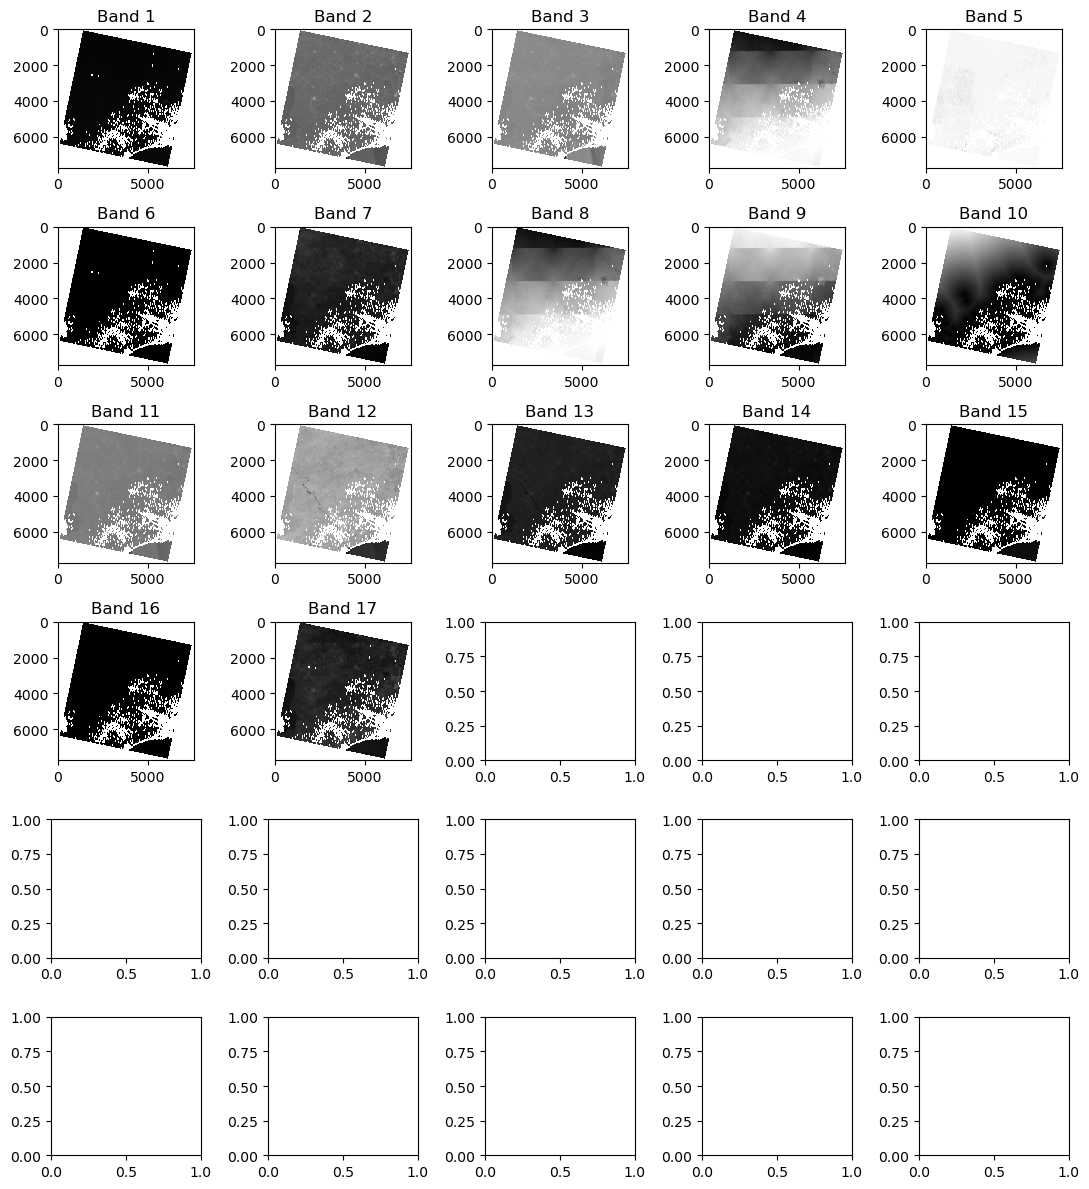

(7731, 7571)


In [68]:
with rasterio.open(run.output['raster'][0].assets[0].path_or_url) as dataset:
    # Print dataset information
    print("Dataset profile:")
    print(dataset.profile)
    print(dataset.read().shape)
    print(dataset.meta)
    print(dataset.descriptions)
    # Number of bands
    num_bands = dataset.count
    print(f"Number of bands: {num_bands}")
    
    # # Print metadata of each band
    # for i in range(1, num_bands + 1):
    #     band = dataset.read(i)
    #     print(band)
    #     print(f"Band {i}: min={band.min()}, max={band.max()}, mean={band.mean()}")
        
    # Visualize a selection of bands (e.g., the first 30 bands)
    bands_to_show = min(num_bands, 30)
    fig, axes = plt.subplots(6, 5, figsize=(11, 12)) 
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    offset = 0
    for i in range(offset, bands_to_show+offset):
        ax = axes[i-offset]
        ax.imshow(dataset.read(i + 1), cmap='gray')
        ax.set_title(f'Band {i + 1}')
    
    plt.tight_layout()
    plt.show()
    print((dataset.read()[0,:,:].shape))

In [61]:
import numpy as np
from skimage import exposure
def s2_to_img(s2, percentile=(0.5, 99.5), gamma=0.9, bands = [3,2,1]):
    """
    Function to create RGB representation of a Sentinel-2 image.
    """
    img = s2[bands].transpose([1, 2, 0])
    print(s2)
    img = img/10000
    nb = img.shape[2]
    # image_numpy = np.clip((image_numpy + 1.0) / 2.0 * 1.8, a_min=0.0, a_max=1.0) * 255.0
    #img = np.clip((img + 1.0) / 2.0, a_min=0.0, a_max=1.0) * 255.0
    img = np.clip(img, a_min=0.0, a_max=1.0) * 255.0
    for b in range(nb):
        plow, phigh = np.percentile(img[...,b], percentile)
        if phigh>plow:
            x_ = exposure.rescale_intensity(img[...,b], in_range=(plow, phigh))
            y_ = (x_ - x_.min()) / (x_.max()-x_.min())
            if gamma!=1.0:
                y_ = y_ ** gamma
            img[...,b] = (y_*255)
    return img.astype(np.uint8)

In [62]:
with rasterio.open(run.output['raster'][0].assets[0].path_or_url) as dataset:
    img = s2_to_img(dataset.read(), percentile=(0.5, 99.5), gamma=0.9, bands = [2,1,0])

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

In [46]:
from IPython.display import Image, display
display(img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

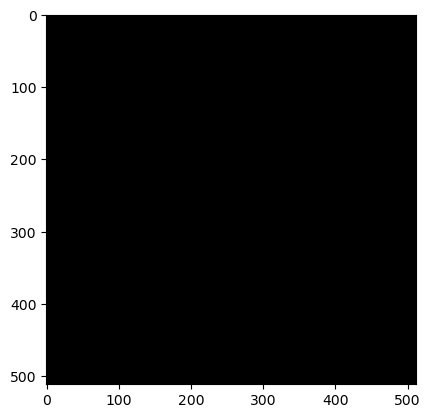

In [47]:
plt.imshow(img[:512,:512,:])

In [22]:
img[:512,:512,:].shape

(512, 512, 3)